findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

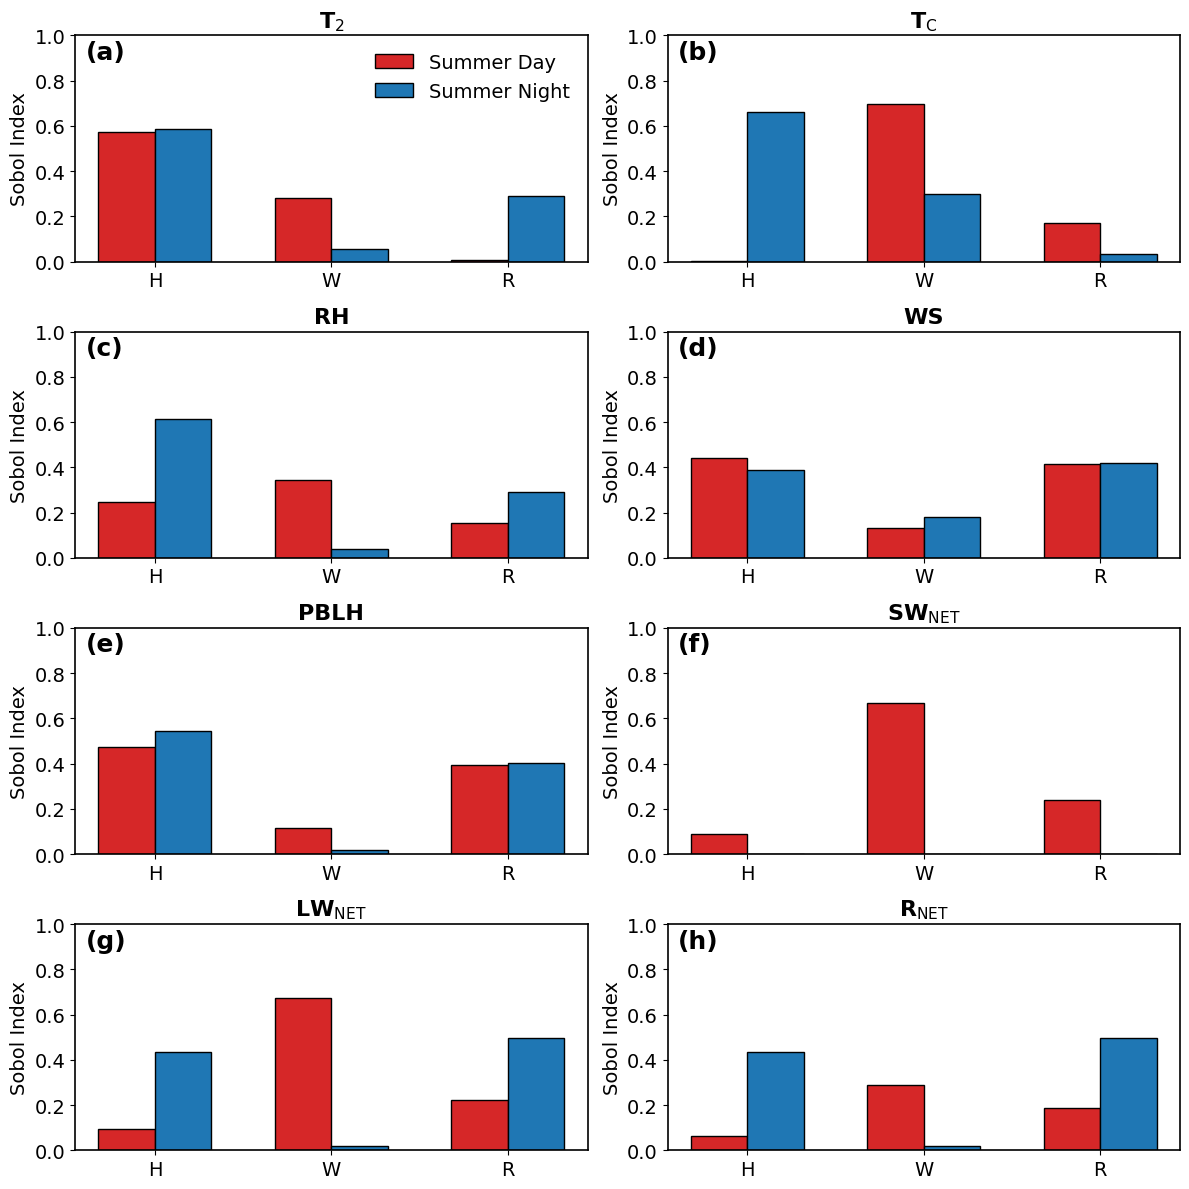

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['mathtext.default'] = 'rm'
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.linewidth": 1.2,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})

# 文件路径
summer_file = "/project2/zhan248_1326/hhao4018/UQ_analysis/PCE_urban_nonurban_summaries_v4/summer/PCE_stats_summer.csv"
df_summer = pd.read_csv(summer_file)
var_col = df_summer.columns[0]

# === 只保留一阶 Sobol 指数：H, W, R ===
sobol_labels  = ["H", "W", "R"]
sobol_csvcols = ["Sobol_H", "Sobol_W", "Sobol_R"]   # 注意顺序与 label 对齐

color_map = {
    ("Summer", "Day"): "#d62728",
    ("Summer", "Night"): "#1f77b4",
}
unit_official_names = {
    'T2': 'T$_2$','TC_URB': 'T$_C$', 'RH': 'RH', 'WS': 'WS',
    'PBLH': 'PBLH', 'SNET_URB': 'SW$_{NET}$', 'LNET_URB': 'LW$_{NET}$', 'NET_URB': 'R$_{NET}$'
}
# 你要输出的8个主变量
target_vars = ["T2", "TC_URB", "RH", "WS", "PBLH", "SNET_URB", "LNET_URB", "NET_URB"]

fig, axes = plt.subplots(4, 2, figsize=(12, 12))
axes = axes.flatten()

for i, base_var in enumerate(target_vars):
    ax = axes[i]
    x = np.arange(len(sobol_labels))  # 现在是 3 个条：H, W, R
    width = 0.32
    offset_list = [-0.5 * width, 0.5 * width]
    label_order = [("Summer", "day"), ("Summer", "night")]

    for idx, (season, period) in enumerate(label_order):
        var_name = f"{base_var}_{period}_city"
        row = df_summer[df_summer[var_col] == var_name]
        if row.empty:
            continue

        # 只取一阶 Sobol 列
        values = row[sobol_csvcols].iloc[0].values.astype(float)

        color = color_map[(season, period.capitalize())]
        label = f"{season} {period.capitalize()}"
        offset = offset_list[idx]

        ax.bar(x + offset, values, width=width,
               color=color, label=label, edgecolor='black')

    ax.set_xticks(x)
    ax.set_xticklabels(sobol_labels, fontsize=14)
    ax.set_ylabel("Sobol Index", fontsize=14)

    try:
        ax.set_title(unit_official_names[base_var], fontsize=16, fontweight='bold')
    except KeyError:
        ax.set_title(base_var, fontsize=16, fontweight='bold')

    ax.set_ylim(0, 1)

    if i == 0:
        ax.legend(loc='upper right', framealpha=0, ncol=1)

    label = f"({chr(97 + i)})"
    ax.text(
        0.02, 0.98,
        label,
        transform=ax.transAxes,
        fontsize=18,
        fontweight='bold',
        va='top',
        ha='left'
    )

plt.tight_layout()
plt.savefig(
   "/project2/zhan248_1326/hhao4018/UQ_analysis/sobol_by_var_Figures_v4/Sobol_City_8Vars_4x2_noInteractions.png",
   dpi=600)
plt.show()
